In [1]:
import sqlite3
import pandas as pd
from tqdm import tqdm
import folium
import numpy as np
import os
import wget

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 


In [2]:
url = 'https://hitchmap.com/dump.sqlite'
filename = 'dump.sqlite'
if os.path.exists(filename):
        os.remove(filename)
filename = wget.download(url)

In [3]:
fn = 'dump.sqlite'
points = pd.read_sql('select * from points where not banned', sqlite3.connect(fn))
points["datetime"] = points["datetime"].astype("datetime64[ns]")

In [4]:
points.head()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
0,0,40.974714,27.511654,3.0,TR,NaN,Tamergem,"If you avoid the mini busses, you can get on a ride within 10 minutes, and Tekirdag city is a bridge between Istanbul and Greece. I always use that city center spot and it is quite good",2011-05-26 10:06:17,1,0,,NaN,NaN,None,None,NaN,1.0
1,1,32.072756,34.793444,4.0,IL,NaN,None,None,NaT,1,0,,NaN,NaN,None,None,NaN,NaN
2,2,41.727928,27.220731,4.0,TR,NaN,None,None,NaT,1,0,,NaN,NaN,None,None,NaN,NaN
3,3,41.099858,29.007339,3.0,TR,NaN,Xavierallard,There is a lot of traffic there and little space to stop. I found it hard.,2011-03-15 12:52:11,1,0,,NaN,NaN,None,None,NaN,1.0
4,4,30.169989,66.999612,3.0,PK,NaN,None,None,NaT,1,0,,NaN,NaN,None,None,NaN,NaN


In [5]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62676 entries, 0 to 62675
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              62676 non-null  int64         
 1   lat             62676 non-null  float64       
 2   lon             62676 non-null  float64       
 3   rating          62676 non-null  float64       
 4   country         62676 non-null  object        
 5   wait            31588 non-null  float64       
 6   nickname        26493 non-null  object        
 7   comment         44254 non-null  object        
 8   datetime        55436 non-null  datetime64[ns]
 9   reviewed        62676 non-null  int64         
 10  banned          62676 non-null  int64         
 11  ip              62676 non-null  object        
 12  dest_lat        11138 non-null  float64       
 13  dest_lon        11138 non-null  float64       
 14  signal          4728 non-null   object        
 15  ri

# activity

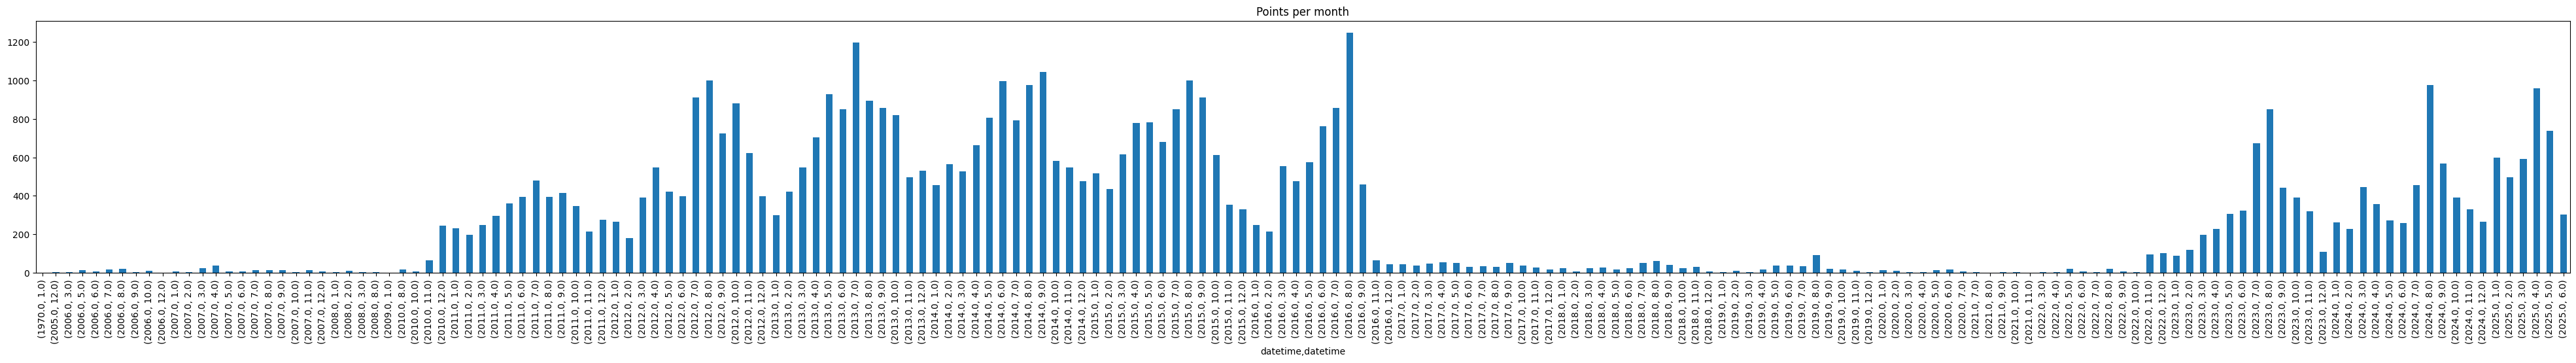

In [6]:
df = points
df["datetime"] = df["datetime"].astype("datetime64[ns]")

plot = df['datetime'].groupby([df["datetime"].dt.year, df["datetime"].dt.month]).count().plot(kind="bar", title="Points per month", figsize=(50, 5))
# plot.figure.savefig("plots/points_per_month.png")

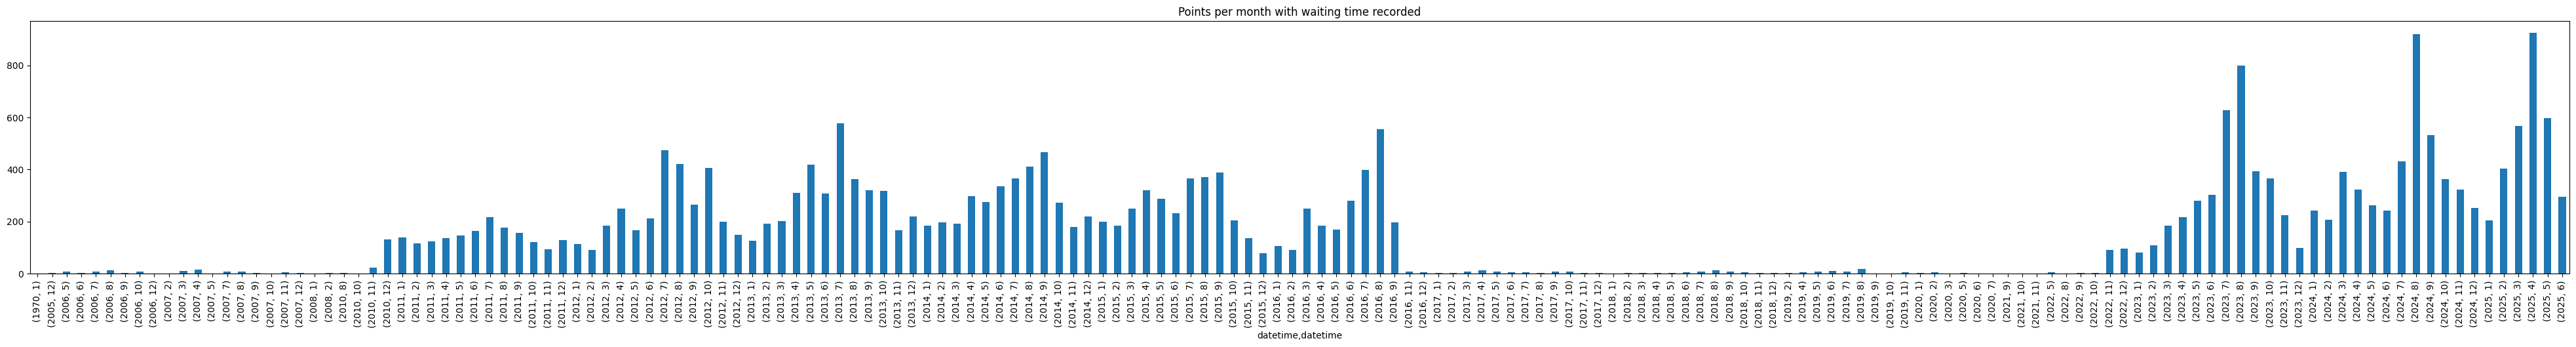

In [7]:
df = points[['datetime', 'wait']].dropna()
df["datetime"] = df["datetime"].astype("datetime64[ns]")

plot = df['datetime'].groupby([df["datetime"].dt.year, df["datetime"].dt.month]).count().plot(kind="bar", title="Points per month with waiting time recorded", figsize=(50, 5))
# plot.figure.savefig("plots/points_per_month_with_waittime.png")

### seasonality


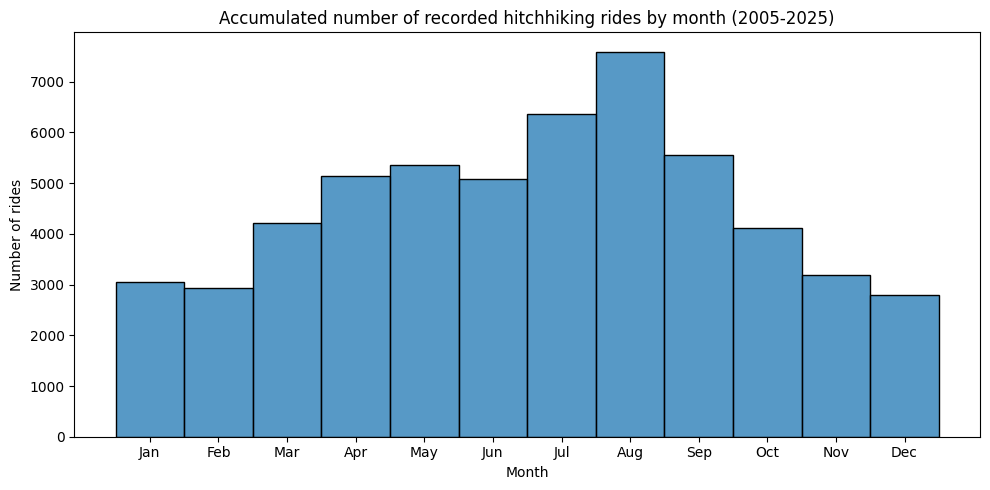

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

df = points.copy()
df["datetime"] = df["datetime"].astype("datetime64[ns]")
df["month"] = df["datetime"].dt.month

plt.figure(figsize=(10, 5))
sns.histplot(df["month"], bins=12, discrete=True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Number of rides")
plt.title("Accumulated number of recorded hitchhiking rides by month (2005-2025)")
plt.tight_layout()
plt.savefig("plots/number_of_rides_per_month.png")
plt.show()

<Figure size 640x480 with 0 Axes>

# history

In [9]:
df = points[points["datetime"].isna()]
len(df), len(points)

(7240, 62676)

In [10]:
df[df["nickname"].notna()]

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
7293,7301,62.210154,25.714746,4.0,FI,30.0,Mikael,None,NaT,1,0,,NaN,NaN,None,None,NaN,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7240 entries, 1 to 35876
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              7240 non-null   int64         
 1   lat             7240 non-null   float64       
 2   lon             7240 non-null   float64       
 3   rating          7240 non-null   float64       
 4   country         7240 non-null   object        
 5   wait            2930 non-null   float64       
 6   nickname        1 non-null      object        
 7   comment         4551 non-null   object        
 8   datetime        0 non-null      datetime64[ns]
 9   reviewed        7240 non-null   int64         
 10  banned          7240 non-null   int64         
 11  ip              7240 non-null   object        
 12  dest_lat        0 non-null      float64       
 13  dest_lon        0 non-null      float64       
 14  signal          0 non-null      object        
 15  ride_dat

In [12]:
df = points.sort_values(by='datetime')
df.head()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
32111,1002124,54.939988,23.876477,3.0,LT,44.0,None,"Good p1ace to stop a car directly to Poland or Germany. All trafic from Tallinn, Riga and Klaipeda goes here",1970-01-01,1,0,,NaN,NaN,None,None,NaN,0.0
31648,1001445,49.179663,6.053789,3.0,FR,223.0,None,>A4 Metz Strasbourg >A4 Paris Reims\n\nBi-directional gas station - cars to both directions thanks to the linking bridge.\nGood if you are staying along A4.\n\nDefinitely to avoid if trying to hitch to Luxembourg or Nancy. Most car will go straight. Better to arrange a hitching place in north south direction along A31,2005-12-27,1,0,,NaN,NaN,None,None,NaN,0.0
31646,1001443,48.829159,2.743320,4.0,FR,73.0,None,"> A4 Reims, Metz, Strasbourg, Germany and Luxembourg\n\nreach this gas station from Bussy Saint Georges RER A train station, then walk through the industrial area of Bussy, then cross onto the bridge, then follow for some hundred meters in the grass along the A4.\n\n25-30 minutes wait.\n\nBest point for getting out of Paris - 45 min by RER\n\nThe Péage is not far from here.\n",2005-12-27,1,0,,NaN,NaN,None,None,NaN,0.0
31647,1001444,49.243001,3.920510,4.0,FR,53.0,None,"> A4 Metz Strasbourg Luxembourg Germany\n\ngood point if you are along A4 and your driver goes in Reims, let him/her stop here.",2005-12-27,1,0,,NaN,NaN,None,None,NaN,0.0
31533,1001242,52.338751,7.408717,4.0,DE,NaN,None,"Parking Area \""Emstal\"".I'm always getting here when I travel from Hörstel. Good to get lifts to the Netherlands!Sometimes a lot of British people stopping here.Last parking before the Kreuz Schüttdorf A30/A31! So you have the chance to get north/west and south!",2006-03-26,1,0,,NaN,NaN,None,None,NaN,0.0


In [13]:
df[df["dest_lat"].notna()].head()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
18195,18207,49.635165,5.970091,4.0,LU,NaN,None,Got a ride after 10 minutes withhout even bothering straight to Lure close to Switzerland which was where I needed to go. Lovely,2017-09-03 20:40:31.000000,1,0,,47.686400,6.494300,None,None,NaN,NaN
49977,3214828793,51.563596,4.732251,5.0,NL,20.0,Bob,"Hitched a ride to Brussels in 20 minutes, stood by the highway sign",2022-11-02 11:11:50.571645,0,0,,50.818835,4.404008,None,None,NaN,0.0
49982,3749781582,50.818835,4.403509,5.0,BE,10.0,Bob,Lots of Luxemburgers get their gas here,2022-11-02 11:37:57.639952,0,0,,49.542950,6.117797,None,None,NaN,0.0
49976,3183651566,49.542950,6.117797,5.0,LU,40.0,Bob,None,2022-11-02 11:39:19.434675,0,0,,47.815554,5.219278,None,None,NaN,0.0
49960,2021104044,45.973277,4.732243,1.0,FR,120.0,Bob,"Weren't allowed onto the peages, hitched from the parking. In retrospect we should have accepted a ride to Lyon from here, specifically to the BP next to the musee des confluences",2022-11-02 11:44:26.882701,0,0,,45.651030,4.832954,None,None,NaN,0.0


In [14]:
df[df["signal"].notna()].head(5)

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
52676,1949823347169815026,50.308681,6.600855,5.0,DE,5.0,Bob,To Steffeln,2024-03-23 11:17:34.374390,0,0,,NaN,NaN,thumb,None,NaN,0.0
59244,6701217548899572199,47.502005,6.812128,3.0,FR,NaN,nuxiygnaw,"Horrid spot to be, heavy traffic but no place to stop for the cars. Still, only place out of Montbéliard in direction of Pont-de-Roide I guess? Met a very kind family that exited the roundabout, parked their car, and came back to fetch me.",2024-03-23 14:40:56.707952,0,0,,47.334975,6.783216,sign,None,NaN,0.0
62668,9219046615257381015,47.696093,6.644283,5.0,FR,1.0,nuxiygnaw,Light traffic but according to the delivery woman who picked me up most cars on this road go to Belfort.,2024-03-23 14:43:23.239461,0,0,,47.632565,6.837375,sign,None,NaN,0.0
52894,2111451352956939790,47.605181,7.617064,5.0,DE,1.0,nuxiygnaw,"Finished visiting Vitra Museum and wanted to head to Mulhouse. Got a ride immediately with sign ""Saint-Louis"". Couldn't have dreamed of a better spot- a shoulder just on the exit of the turn, heavy traffic going EuroAirport direction.",2024-03-23 14:52:34.497362,0,0,,47.593757,7.555281,sign,None,NaN,0.0
61785,8577136985874050527,47.774276,7.379798,2.0,FR,60.0,nuxiygnaw,bad spot for Belfort +1,2024-03-23 15:02:13.489398,0,0,,47.632887,6.850488,sign,None,NaN,0.0


In [15]:
df[~df["nickname"].isna()].head(1)

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
6781,6789,54.644089,25.205024,2.0,LT,NaN,Mikael,"From here you can walk to the next HH spot furthermore on the road, where it's no busses going anyway.",2010-08-11 23:30:01,1,0,,NaN,NaN,None,None,NaN,1.0


In [16]:
old = points[points["datetime"] < "2010-08-11"].sort_values(by='datetime')
old = old[old["datetime"] > "2005-08-01"]
m = folium.Map(location=[old['lat'].mean(), old['lon'].mean()], zoom_start=2)
for _, row in tqdm(old.iterrows()):
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=2).add_to(m)
m

236it [00:00, 10417.67it/s]


In [17]:
# there are multiple people who submitted points before 2010
old[old["datetime"] > "2007-03-28"].head(12)

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
5306,5314,62.830386,10.008566,4.0,NO,NaN,None,None,2007-03-29,1,0,,NaN,NaN,None,None,NaN,NaN
5326,5334,63.413435,10.398259,2.0,NO,NaN,None,None,2007-03-29,1,0,,NaN,NaN,None,None,NaN,NaN
31511,1001190,60.077045,11.150694,5.0,NO,NaN,None,This is a highly frequented gas station towards Oslo. If you hitched a ride which is not going directly to Oslo you might tell him to let you out at the Kløfta gas station. I got a ride after one minute at 10 p.m. in the dark.,2007-03-29,1,0,,NaN,NaN,None,None,NaN,0.0
31514,1001193,62.223436,9.549780,3.0,NO,NaN,None,It is cold in the winter and cars go fast - but in the summer and on weekends there might be many tourists and the traffic slower.,2007-03-29,1,0,,NaN,NaN,None,None,NaN,0.0
31516,1001195,62.830386,10.008566,4.0,NO,NaN,None,"If you're going south, this is the point\nwhere you should decide which way you\nwant to take: The E6 through Oppdal is\nnicer and easier to follow, the route 3\nthrough Elverum is boring, but faster\nand trucks take this way. In Rennebu\nthere are several Gas stations and good\nplaces to try hitching.",2007-03-29,1,0,,NaN,NaN,None,None,NaN,0.0
31517,1001196,63.326017,10.327234,4.0,NO,8.0,None,Getting out of trondheim sucks - but here somebody picked me up after a while and took me further south from whereon everything went fine.,2007-03-29,1,0,,NaN,NaN,None,None,NaN,0.0
31519,1001202,63.413435,10.398259,2.0,NO,NaN,None,"It is very difficult to impossible to catch a ride along the E6 in Trondheim. The road has two lanes, cars go very fast and bus stops are separated from the road, so it's not easy to stop.",2007-03-29,1,0,,NaN,NaN,None,None,NaN,0.0
5310,5318,60.077045,11.150694,5.0,NO,NaN,None,None,2007-03-29,1,0,,NaN,NaN,None,None,NaN,NaN
31595,1001353,47.770253,19.917698,4.0,HU,5.0,None,direction: Budapest,2007-03-30,1,0,,NaN,NaN,None,None,NaN,0.0
31510,1001189,59.910180,10.794239,3.0,NO,60.0,None,It's hard to get out of Oslo - but after a couple of miles walking i found this place and somebody stopped and took me to a gas station further out from where everything went fine. I was going north.,2007-04-01,1,0,,NaN,NaN,None,None,NaN,0.0


In [18]:
df[(df["datetime"] > "2017-01-01") & (df["datetime"] < "2020-05-01")]["nickname"].value_counts()
# no-one adding spots consistntly in this period

nickname
Sitko                13
Lois                 10
LaZubi                7
Colinc                6
Shiny                 4
Putti                 4
Lukas                 4
Francesc4052          3
Stadas                3
                      2
AdrianB               2
Cigale                2
Maxdubi               2
Cardinal              2
Phidias81             2
Yhtam                 2
Thumb-up              2
Ludmil                2
Bame4                 1
Dan Vertígo           1
Uncle sam01           1
Japanangka            1
Mave94                1
Dunia                 1
Ratodoporao           1
TBF                   1
Daftbot               1
Sigmacreed            1
Makusq                1
Fverhart              1
Gr0env!nk             1
Fraughtwithsounds     1
Huguerl               1
Markolorinc           1
Dadzios               1
Arno Nuem             1
Tatianaabreu          1
Reggae-girl           1
Laurieking101         1
Name: count, dtype: int64

In [19]:
# there are users who kept adding over 2017 but something caused a heavy drop in activity of other users
df[df["nickname"] == "Sitko"].tail()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
20821,20833,40.191479,-8.431545,5.0,PT,NaN,Sitko,"we were 3 and got a lift in 45 minutes. i went just to Leiria, others went to Lisboa with the driver :)",2017-03-08 19:54:07,1,0,,NaN,NaN,None,None,NaN,1.0
27677,27691,39.741209,-8.792637,4.0,PT,NaN,Sitko,20 minut to Condeixa,2017-03-08 19:54:39,1,0,,NaN,NaN,None,None,NaN,1.0
29455,29469,40.228027,-8.445989,5.0,PT,15.0,Sitko,"on saturday at round 10, two people, 15 minutes",2017-03-14 11:54:41,1,0,,NaN,NaN,None,None,NaN,1.0
29456,29470,40.180894,-8.675983,4.0,PT,15.0,Sitko,"saturday afternoon, to people, 15 minutes to coimbra. i think it's a good place because people pass by and aren't that fast, thus those who want to stop will do it. and the gas station has traffic all the time :)",2017-03-14 11:56:34,1,0,,NaN,NaN,None,None,NaN,1.0
11738,11747,36.837145,-2.480421,3.0,ES,NaN,Sitko,i was there for 3 hours to get a lift to a gas station near roquetas.,2017-03-29 11:02:31,1,0,,NaN,NaN,None,None,NaN,1.0


In [20]:
df[df["nickname"] == "Thumb-up"].tail()

,id,lat,lon,rating,country,wait,nickname,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal,ride_datetime,user_id,from_hitchwiki
30728,30742,51.481908,8.221913,4.0,DE,15.0,Thumb-up,None,2016-08-14 17:52:43,1,0,,NaN,NaN,None,None,NaN,1.0
30729,30743,51.504686,8.133512,3.0,DE,20.0,Thumb-up,None,2016-08-14 17:56:01,1,0,,NaN,NaN,None,None,NaN,1.0
30771,30785,51.497768,7.456198,4.0,DE,15.0,Thumb-up,None,2016-08-16 14:25:19,1,0,,NaN,NaN,None,None,NaN,1.0
20408,20420,47.995321,7.833660,3.0,DE,5.0,Thumb-up,Just a little percentage of the passing cars are heading onto the highway. Directly on the on-ramp it worked a lot better!\n,2017-03-02 11:37:53,1,0,,NaN,NaN,None,None,NaN,1.0
30169,30183,51.398530,9.765333,4.0,DE,NaN,Thumb-up,"Getting to Kassel is super easy. If you want to get south, ask to get dropped at a small parking along the highway, because there is no more service area before Kassel. And freaking everybody is going to Kassel",2017-04-06 18:55:27,1,0,,NaN,NaN,None,None,NaN,1.0


In [21]:
df[(df["datetime"] < "2017-01-01") & (df["datetime"] > "2005-05-01")]["nickname"].value_counts()


nickname
Koendev                          516
Prochy                           371
Ewelinalucy                      230
Ewan gweznou                     228
Fverhart                         223
Mcandet                          186
Emanuele19956                    167
Railway                          151
Thumb-up                         140
Siberian explorer                115
AdrianB                          101
                                 101
Sipmester                        100
Sorokin                           97
Tomtom                            97
Gustavobretz                      92
Fraughtwithsounds                 90
K9f100                            88
Sitko                             82
Looking for Stu                   78
Az-alcmar                         76
Vovka-p                           74
Mikan                             74
Dadzios                           72
Kovacspetyesz                     72
Mino.ilmagico                     70
Dzeikobas                    

In [22]:
groups = points.groupby(["lat", "lon"])
places = groups[["country"]].first()
places["rating"] = groups.rating.mean()
places["points"] = groups.size()

In [23]:
places['score'] = places['rating']**3 * places['points']
places.sort_values("score", ascending=False).head(5)

,,country,rating,points,score
lat,lon,,,,
51.079746,13.739534,DE,4.733333,30,3181.431111
52.350834,16.732392,PL,4.923077,26,3102.295858
49.542950,6.117797,LU,4.880000,25,2905.356800
55.631100,12.656323,DK,4.916667,24,2852.486111
50.008777,14.545544,CZ,4.954545,22,2675.679752


# top contributors

In [41]:
points[points.nickname != ""].nickname.value_counts().head(20)

nickname
Koendev              516
Prochy               371
Ewelinalucy          230
Ewan gweznou         228
Fverhart             224
Mcandet              186
Emanuele19956        167
Railway              151
Thumb-up             142
Markon               130
VeikkaK              116
Siberian explorer    115
AdrianB              113
Emilien              100
Sipmester            100
Tomtom               100
Zenit                 97
Sorokin               97
Sitko                 95
Chris9012             92
Name: count, dtype: int64

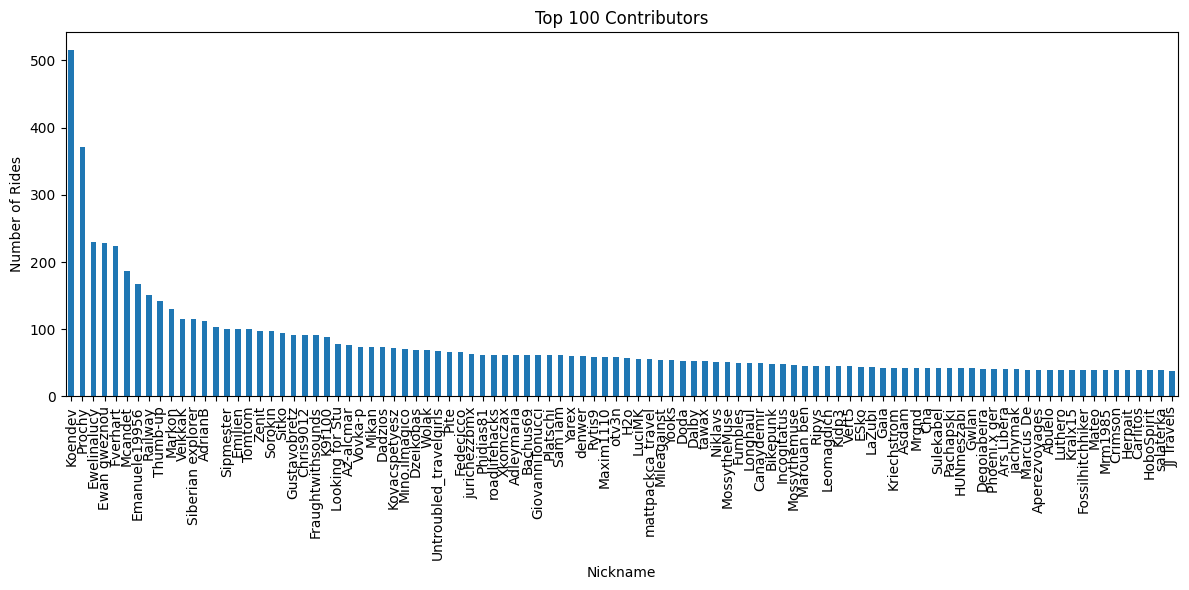

In [52]:
import matplotlib.pyplot as plt

user_counts = points.nickname.value_counts().head(100)
plt.figure(figsize=(12, 6))
user_counts.plot(kind='bar')
plt.xlabel('Nickname')
plt.ylabel('Number of Rides')
plt.title('Top 100 Contributors')
plt.tight_layout()
plt.savefig("plots/top_100_contributors.png")
plt.show()

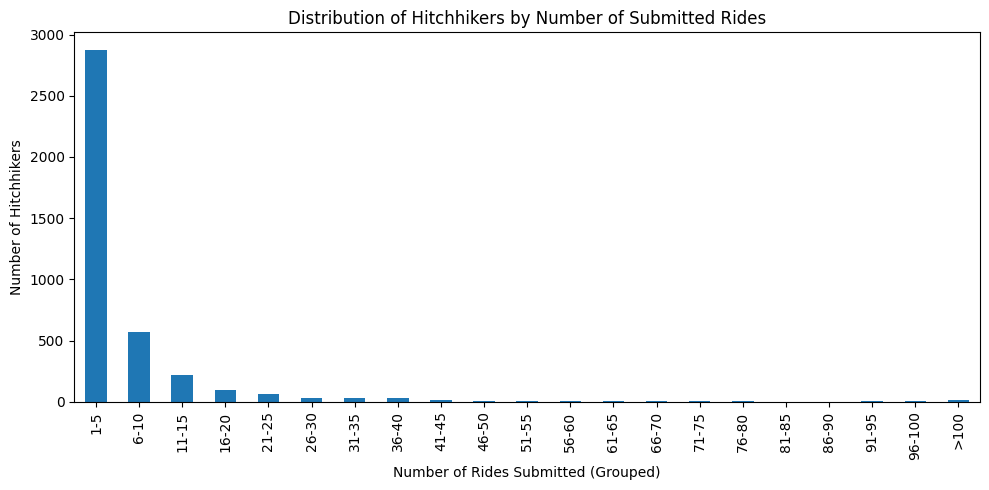

In [55]:
user_counts = points.nickname.value_counts()

bins = list(range(0, 105, 5)) + [np.inf]
labels = [f'{i+1}-{i+5}' for i in range(0, 100, 5)] + ['>100']
grouped = pd.cut(user_counts.values, bins=bins, labels=labels, right=True)
grouped_counts = pd.Series(grouped).value_counts().sort_index()

plt.figure(figsize=(10, 5))
grouped_counts.plot(kind='bar')
plt.xlabel('Number of Rides Submitted (Grouped)')
plt.ylabel('Number of Hitchhikers')
plt.title('Distribution of Hitchhikers by Number of Submitted Rides')
plt.tight_layout()
plt.savefig("plots/distribution_of_hitchhikers_by_number_of_submitted_rides.png")
plt.show()


In [ ]:
# recent
points[points.datetime.dt.year == 2024].nickname.value_counts().head(20)

nickname
Emilien            100
VeikkaK             66
roadlifehacks       62
denwer              56
GiovanniTonucci     54
MossytheMuse        44
Chris9012           43
Carlitos            39
jurichezzbmx        35
Kompas              34
otv3n               33
Alpazel             31
Bursztyn            31
Luthero             31
tawax               30
jkczech             29
adeljindrova        29
TajineMachine       28
jachymak            28
bogdanpanow         28
Name: count, dtype: int64